In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime as dt

In [90]:
n = 24
da = xr.DataArray(np.random.randn(n), coords={'time': pd.date_range('2017-1-1', periods=n, freq='MS')}, 
                  dims=['time'])
da.time

<xarray.DataArray 'time' (time: 24)>
array(['2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-01-

In [104]:
def _season_datetime(x):
    return [dt.datetime(y, m+2, 1) if m < 10 else dt.datetime(y+1, 1, 1) for y, m in zip(x.dt.year, x.dt.month)]

def month_to_season(da):
    """
    Calculates time series of seasonal averages from monthly values
    """
    
    if (da.time.dt.month[0] != 1) | ((da.time.size % 12) != 0):
        print ('Expects DataArray with time dimension factor of 12 starting on January')
        return None
    
    # Calculate first DJF mean from J and F
    first = da.isel(time=slice(None,2)).mean(dim='time').expand_dims('time')
    first['time'] = [da['time'][0].values] # Assign time as coordinate
    
    # Calculate rest of season means
    other = da.isel(time=slice(2,None)).resample(time='3M', closed='left', label='left').mean()
    other['time'] = _season_datetime(other.time) # Assign middate for season
    
    return xr.concat([first,other], 'time')

In [105]:
daSsn = month_to_season(da)

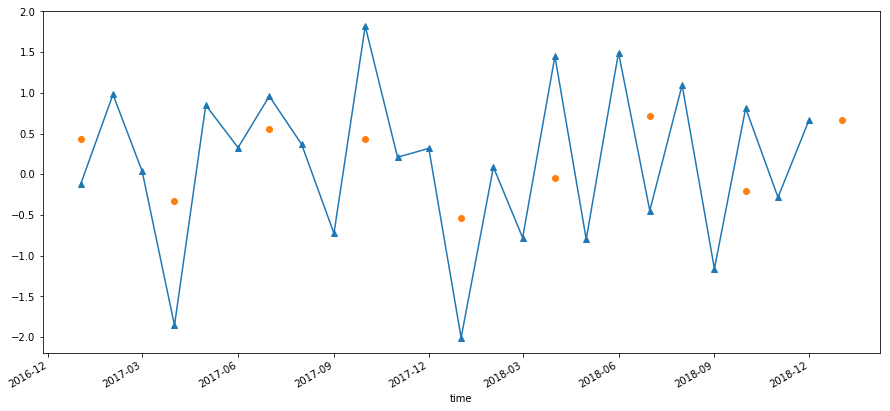

In [106]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))

da.plot.line('-^')
daSsn.plot.line('o')

In [107]:
daSsn.time

<xarray.DataArray 'time' (time: 9)>
array(['2017-01-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01 2017-04-01 2017-07-01 ...